In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Imported all the required libaries and CIFAR100 datset

In [13]:

batch_size = 64
learning_rate = 3e-3
num_epochs = 50

# Data preprocessing and augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True)

I have set the batch size to 64. I tried increasing and decreasing it and found this to be most optimum. Number of epochs that is iterations are currently set to 50 and can be further increased to increase the accuracy. Learning rate(used in optimization) has been set to 3e-3

Data preprocessing is also done in this step.
I divided it by 255 as rgb has value from 0-255 for each color

In [14]:

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Loaded CIFAR100 dataset and splitted it for training and testing

In [15]:

# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)


Converted training and testing labels to one-hot encoded categorical format with 100 classes.

In [16]:

# Create data generators
train_generator = data_gen.flow(x_train, y_train, batch_size=batch_size)
test_generator = data_gen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)


Made batches with size equal to 64(set before) of already processed data

In [17]:

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='softmax')
])


 I defined a convolutional neural network (CNN) from scratch using the Sequential API.I made a model which includes alternating convolutional layers with ReLU activation and max-pooling layers for feature extraction. Then, the extracted features are flattened and passed through fully connected layers with ReLU activation and dropout regularization to prevent overfitting. Finally, the output layer with softmax activation predicts the probabilities of the input image belonging to each of the 100 classes."



In [18]:

# Compile the model
optimizer = SGD(learning_rate=learning_rate, momentum=0.9, weight_decay=5e-4)
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])


In this part I compiled up my model using SGD optimizer with learning rate= 3e-3

I tried using Adam optimizer as well but found this to be more optimum.

 For loss calculation, I've used categorical cross-entropy, suitable for multi-class classification tasks.I'm also monitoring the accuracy metric to evaluate the model's performance.






In [19]:

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


782/782 [==============================] - 19s 22ms/step - loss: 4.6010 - accuracy: 0.0126 - val_loss: 4.5764 - val_accuracy: 0.0176
Epoch 2/50
782/782 [==============================] - 17s 22ms/step - loss: 4.4515 - accuracy: 0.0287 - val_loss: 4.2300 - val_accuracy: 0.0455
Epoch 3/50
782/782 [==============================] - 18s 22ms/step - loss: 4.2029 - accuracy: 0.0459 - val_loss: 4.0263 - val_accuracy: 0.0715
Epoch 4/50
782/782 [==============================] - 17s 22ms/step - loss: 4.0509 - accuracy: 0.0705 - val_loss: 3.8886 - val_accuracy: 0.1058
Epoch 5/50
782/782 [==============================] - 17s 22ms/step - loss: 3.9259 - accuracy: 0.0869 - val_loss: 3.7510 - val_accuracy: 0.1176
Epoch 6/50
782/782 [==============================] - 17s 22ms/step - loss: 3.8365 - accuracy: 0.0976 - val_loss: 3.6460 - val_accuracy: 0.1384
Epoch 7/50
782/782 [==============================] - 17s 22ms/step - loss: 3.7356 - accuracy: 0.1179 - val_loss: 3.5524 - val_accuracy: 0.1512
Epo

This is most important part which is training. I am training it using fit function. The model is trained on already processed train_data for specific number of epochs( currently I have set it to 50).

Increasing the number of epochs can increase the accuracy.

Additionally, I've  provided the test_generator for validation during training to monitor the model's performance on unseen data.

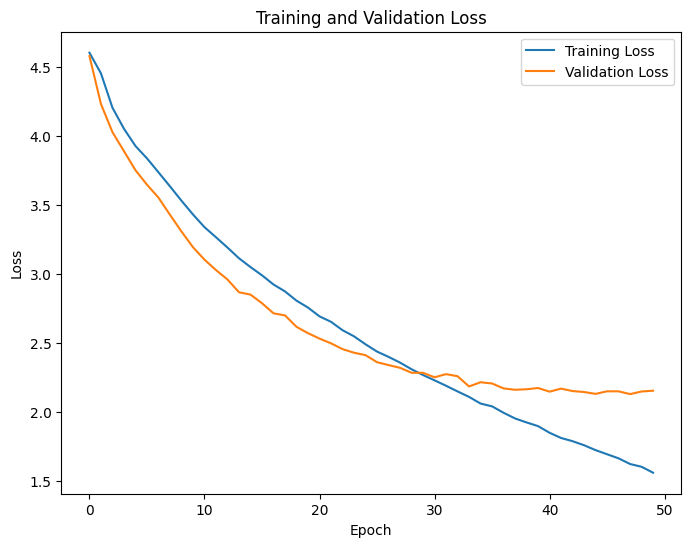

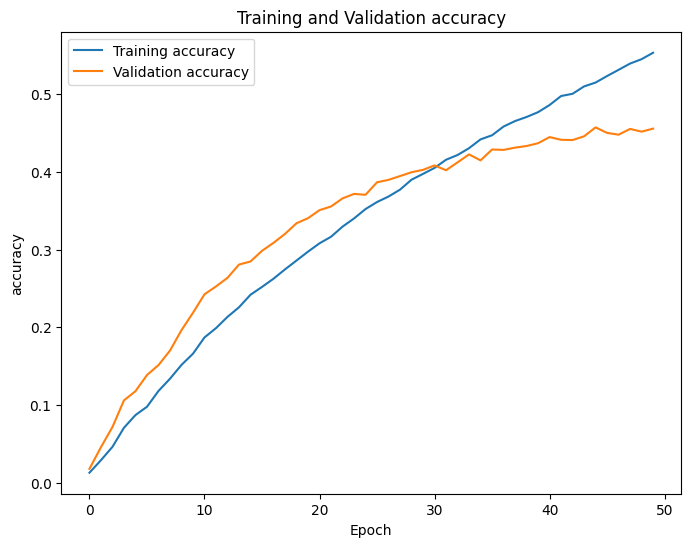

In [20]:

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In this part I plotted loss vs number of epochs and accuracy vs number of epochs to view the progress,

I plotted it for validation data as well

In [21]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')


157/157 [==============================] - 1s 8ms/step - loss: 2.1509 - accuracy: 0.4590
Test loss: 2.1509, Test accuracy: 0.4590


This is the final testing moment of model where I test my model on preprocessed test_data and calculate loss and accuracy. The accuracy comes out to be 45%

The accuracy is not really great but can be further improved by increasing number of epochs or using transfer learning on pre trained models.
.

2/2 [==============================] - 0s 7ms/step


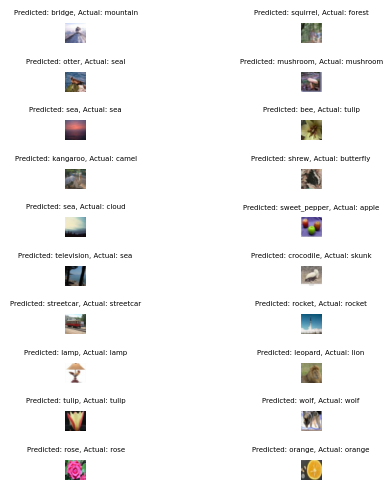

In [22]:

# Function to display predictions
def display_images(model, test_generator, num_images=20):
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)
    class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

    num_cols = 2  # Number of columns in the subplot grid
    num_rows = num_images // num_cols  # Number of rows in the subplot grid

    plt.figure(figsize=(7, 5))  # Increase the figure size
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(test_images[i])
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(test_labels[i])
        class_name = class_names[predicted_class]
        plt.title(f'Predicted: {class_name}, Actual: {class_names[true_class]}', fontsize=5)  # Increase the font size
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(model, test_generator)


This is just the testing part of my model where I take some random images and run my model on them. Then I print the actual and predicted classification to see how well my code works

## **Acknowledgements**

1. ***https://github.com/shuoros/cifar100-resnet50-pytorch***

    I refered to this code while working on this project. This code is made using
    pytorch. I tried to understand this code and tried to implement same using keras and tensorflow.

2. ***Open AI ChatGpt***

    I also used ChatGpt for helping me with some of keras and tensorflow libraries.



# **Areas of Improvement**

1. **Using Transfer learning**

    I think incorporating any pre trained model like Resnet or VGG16 using transfer learning is the best way to increase the model effecincy. I tried using transfer learning but it increased the time so went along with this.

2. **Adding more layers**

    Adding more layers can also increase the effeciency of the model. This is the basic model I tried to made

3. **Increasing Data size**

    Increasing the train data size is also a good way to increase accuracy. This will increase the generalisation of the model. For now I went with CIFAR100 which has around 50000 images

4. **Changing Learning Rate**

    Learning Rate also plays important role in deciding accuracy rate.



# **Difficulties Faced**




1. I was first working with COCO datset but it was very large and hence faced a lot of difficulty in working with the code. I later shifted to CIFAR100 and found it be most optimum.

2. I faced a lot of errors while training the model specially in shape
   incompatibility and made a lot of modifications to finally rectify it.

3. Choosing an optimizer was also an task. I first chose Adam optimizer but found the accuracy lower than SGD optimizer so finally went ahead with this.
